<h1><center>K-Means Clustering</center></h1>

## Введение

Есть много моделей для **кластеризации**. В этом блокноте мы рассмотрим модель, которая считается одной из самых простых. Несмотря на свою простоту, **K-means** широко используется для кластеризации во многих приложениях для обработки данных, что особенно полезно, если вам нужно быстро обработать **неразмеченые данные**. В этой записной книжке вы узнаете, как использовать k-Means для сегментации клиентов.

Некоторые применения k-средних:
- Сегментация клиентов
- Понять, что пытаются сделать посетители сайта
- Распознавание паттернов
- Машинное обучение
- Сжатие данных


В этой записной книжке мы рассмотрим кластеризацию с k-средними с двумя примерами:
- k-средние на случайном сгенерированном наборе данных
- Использование k-средних для сегментации клиентов

### Импорт библиотек
Давайте сначала импортируем необходимые библиотеки.
Также запустите <b> %matplotlib inline </b>, так как мы будем строить графики в этом разделе.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

<h1 id="random_generated_dataset">k-средние на случайно сгенерированном наборе данных</h1>
Давайте создадим наш собственный набор данных.

Сначала нам нужно установить случайное семя. Используйте функцию <b> numpy's random.seed() </b>, где начальное число будет установлено в <b> 0 </b>

In [2]:
np.random.seed(0)

Далее мы будем создавать <i> случайные кластеры </i> точек, используя класс <b> make_blobs </b>. Класс <b> make_blobs </b> может принимать множество входных данных, но мы будем использовать эти конкретные. <br> <br>
<b> <u> Ввод </u> </b>
<ul>
     <li> <b> n_samples </b>. Общее количество точек, поровну разделенных между кластерами. </li>
     <ul> <li> Значение будет: 5000 </li> </ul>
     <li> <b> centers</b>. Количество создаваемых центров или фиксированные местоположения центров. </li>
     <ul> <li> Значение будет: [[4, 4], [-2, -1], [2, -3], [1,1]] </li> </ul>
     <li> <b> cluster_std </b>. Стандартное отклонение кластеров. </li>
     <ul> <li> Значение будет: 0,9 </li> </ul>
</ul>
<br>
<b> <u> Вывод </u> </b>
<ul>
     <li> <b> X </b>: массив форм [n_samples, n_features]. (Матрица функций) </li>
     <ul> <li> Сгенерированные образцы. </li> </ul>
     <li> <b> y </b>: массив форм [n_samples]. (Вектор ответа) </li>
     <ul> <li> Целочисленные метки для принадлежности к кластеру каждого образца. </li> </ul>
</ul>

In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Отображение графика рассеяния случайно сгенерированных данных.

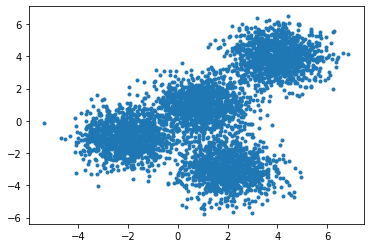

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

<h2 id="setting_up_K_means">Настройка K-Means</h2>
Теперь, когда у нас есть случайные данные, давайте настроим нашу K-Means кластеризацию.

Класс KMeans имеет много параметров, которые можно использовать, но мы будем использовать эти три:
<ul>
     <li> <b> init </b>: метод инициализации центроидов. </li>
     <ul>
         <li> Значение будет: "k-means ++" </li>
         <li> k-means ++: интеллектуальный способ выбора начальных центров кластеров для k-средней кластеризации для ускорения конвергенции. </li>
     </ul>
     <li> <b> n_clusters </b>: количество формируемых кластеров, а также количество центроидов, которые нужно сформировать. </li>
     <ul> <li> Значение будет равно 4 (поскольку у нас есть 4 центра) </li> </ul>
     <li> <b> n_init </b>. Время, в течение которого алгоритм k-средних будет работать с разными начальными точками центроида. Окончательные результаты будут наилучшим результатом последовательных прогонов n_init с точки зрения инерции. </li>
     <ul> <li> Значение будет: 12 </li> </ul>
</ul>

Инициализируйте KMeans с этими параметрами, где выходной параметр называется <b> k_means </b>.

In [5]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

Теперь давайте подгоним модель KMeans к матрице объектов, которую мы создали выше, <b> X </b>

In [6]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Теперь давайте определим метки для каждой точки в модели с помощью KMeans атрибута <b>.labels\_ </b>  и сохраним его как <b> k_means_labels </b>

In [7]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

Мы также получим координаты центров кластеров с помощью K Means <b> .cluster&#95;centers&#95; </b> и сохраним их как <b> k_means_cluster_centers </b>

In [8]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

<h2 id="creating_visual_plot">Создание визуального графика</h2>
Итак, теперь, когда у нас есть сгенерированные случайные данные и инициализирована модель KMeans, давайте посмотрим, как они выглядят!

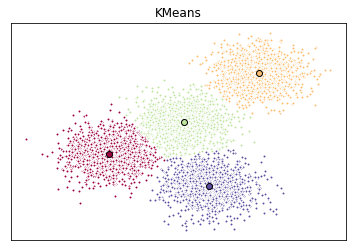

In [9]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Практика
Попробуйте сгруппировать вышеуказанный набор данных в 3 кластера.
Примечание: не генерируйте данные снова, используйте тот же набор данных, что и выше.

In [ ]:
# write your code here



Дважды щелкните __здесь__ чтобы увидеть решение.

<!-- Your answer is below:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()


-->

<h1 id="customer_segmentation_K_means">Сегментация клиентов с помощью K-Means</h1>
Представьте, что у вас есть набор данных клиентов, и вам нужно применить сегментацию клиентов к этим историческим данным.
Сегментация клиентов - это практика разделения клиентской базы на группы записей, которые имеют сходные характеристики. Это важная стратегия, так как бизнес может ориентироваться на эти конкретные группы клиентов и эффективно распределять маркетинговые ресурсы. Например, в одну группу могут входить клиенты с высоким доходом, то есть с большей вероятностью приобретающие продукты или подписывающиеся на услугу. Бизнес-задача - удержать этих клиентов. Другая группа может включать клиентов из некоммерческих организаций. И так далее.

### Загрузите данные из файла CSV  
Прежде чем вы сможете работать с данными, вы должны использовать URL, чтобы получить Cust_Segmentation.csv.

In [10]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2

<h2 id="pre_processing">Предварительная обработка</h2

Как видите, __Address__ в этом наборе данных является категориальной переменной. Алгоритм k-средних не применим напрямую к категориальным переменным, потому что евклидова функция расстояния на самом деле не имеет смысла для дискретных переменных. Итак, давайте отбросим эту функцию и запустим кластеризацию.

In [11]:
df = cust_df.drop('Address', axis=1)
df.head()

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2

#### Нормализация по стандартному отклонению
Теперь давайте нормализуем набор данных. Но зачем нам нормализация? Нормализация - это статистический метод, который помогает математическим алгоритмам одинаково интерпретировать объекты с различными величинами и распределениями. Мы используем __StandardScaler()__, чтобы нормализовать наш набор данных.

In [12]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

<h2 id="modeling">Моделирование</h2>

В нашем примере (если бы у нас не было доступа к алгоритму k-средних), это было бы то же самое, что и предположить, что у каждой группы клиентов будет определенный возраст, доход, образование и т. д. с несколькими тестами и экспериментами. Однако, используя кластеризацию K-средних, мы можем сделать этот процесс намного проще.

Давайте применим k-means к нашему набору данных и посмотрим на метки кластера.

In [13]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 1 0 2 1 2 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 2 1 2 1 1 1 1 1 1
 1 1 2 1 2 1 0 1 2 1 1 1 2 2 1 1 2 2 1 1 1 2 1 2 1 2 2 1 1 2 1 1 1 2 2 2 1
 1 1 1 1 2 1 2 2 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 2 1 1 2 0 1 2 1 1 1 1 1 1 0 2 1 1 1 1 2 1 1 2 2 1 2 1 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 0 2 1 1 1 1 1 1 1 2 1 1 1 1
 1 1 2 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 1 1 0 1 1 1 2 1 2 2 2 1
 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 2 1 0 1 1 1 1 2 1 2 2 2 1 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 2 1 1 1 2 1 

<h2 id="insights">Внутри</h2>
Мы назначаем метки каждой строке в кадре данных.

In [14]:
df["Clus_km"] = labels
df.head(5)

Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  Clus_km  
0        0.0              6.3        1  
1        0.0             12.8        2  
2        1.0             20.9        1  
3        0.0              6.3        1  
4        0.0              7.2        0

Мы можем легко проверить значения центроидов, усредняя функции в каждом кластере.

In [15]:
df.groupby('Clus_km').mean()

Customer Id        Age       Edu  Years Employed      Income  \
Clus_km                                                                 
0         410.166667  45.388889  2.666667       19.555556  227.166667   
1         432.006154  32.967692  1.613846        6.389231   31.204615   
2         403.780220  41.368132  1.961538       15.252747   84.076923   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Clus_km                                                     
0         5.678444   10.907167   0.285714         7.322222  
1         1.032711    2.108345   0.284658        10.095385  
2         3.114412    5.770352   0.172414        10.725824

Теперь давайте посмотрим на распределение клиентов в зависимости от их возраста и дохода:

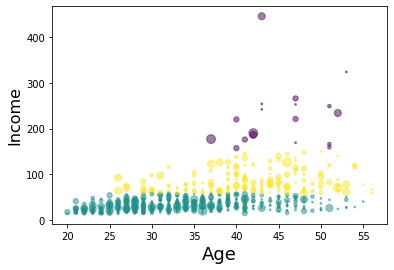

In [16]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()


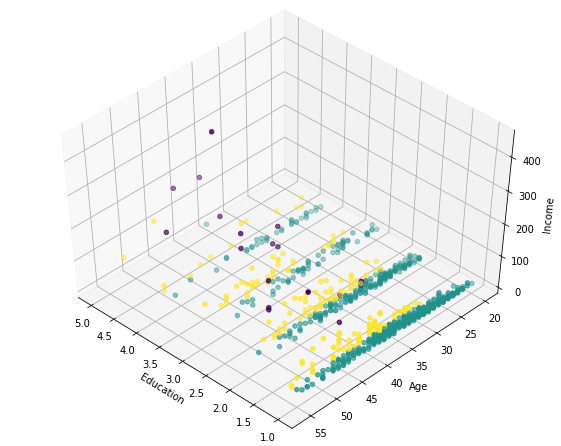

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


k-means разделит клиентов на взаимоисключающие группы, например, на 3 кластера. Клиенты в каждом кластере похожи друг на друга демографически.
Теперь мы можем создать профиль для каждой группы, учитывая общие характеристики каждого кластера.
Например, 3 кластера могут быть:

- БОГАТЫЙ, ОБРАЗОВАННЫЙ И СТАРЫЙ
- СРЕДНИЙ ВОЗРАСТ И СРЕДНИЙ ДОХОД
- МОЛОДОЙ И НИЗКИЙ ДОХОД